In [1]:
import os
import base64
import requests
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from io import BytesIO
from PIL import Image
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
puzzle_url = 'https://www.jigsawplanet.com/?rc=play&pid=33ccf23c674b'
puzzle_id = puzzle_url.split('=')[-1]

if not os.path.exists(f'{puzzle_id}'):
    os.mkdir(f'{puzzle_id}')
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_driver_path = './chromedriver.exe'
    chrome_driver_service = Service(executable_path=chrome_driver_path)
    driver = webdriver.Chrome(
        service=chrome_driver_service, options=chrome_options)
    driver.get(puzzle_url)
    driver.implicitly_wait(10)
    page_source = driver.page_source
    driver.quit()
    all_data = BeautifulSoup(page_source, 'html.parser')
    all_pieces = all_data.find(
        'div', {'class': 'unselectable game'}).find_all('img')
    all_pieces = [piece['src'] for piece in all_pieces]
    for i, base64_string in tqdm(enumerate(all_pieces), total=len(all_pieces)):
        base64_string = base64_string.split(',')[1]
        image_data = base64.b64decode(base64_string)
        image_stream = BytesIO(image_data)
        image = Image.open(image_stream)
        with open(f'./{puzzle_id}/{i}.png', 'wb') as f:
            image.save(f, "PNG")

In [4]:
images = []
for image_path in os.listdir(f'./{puzzle_id}'):
    images.append(imageio.imread(f'./{puzzle_id}/{image_path}'))

C:\Users\Shashank\AppData\Local\Temp\ipykernel_3656\102179673.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'./{puzzle_id}/{image_path}'))


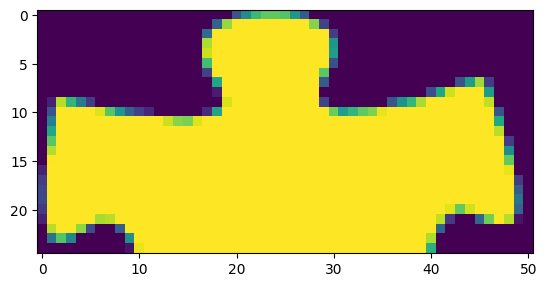

In [30]:
plt.imshow(images[25][:50//2, :, 3])